In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from pandas.api.types import CategoricalDtype
import warnings
warnings.filterwarnings('ignore')
import os
import folium
from folium.plugins import HeatMap

In [3]:
rcParams['figure.figsize'] = 22,11

In [4]:
df = pd.read_csv('/Users/fangcheng/sklearn/项目五：EDA-波士顿犯罪分析.ipynb/crime.csv',encoding='latin-1')
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
OFFENSE_CODE,319073.0,2317.546956,1185.285543,111.000000,1001.000000,2907.000000,3201.000000,3831.000000
YEAR,319073.0,2016.560586,0.996344,2015.000000,2016.000000,2017.000000,2017.000000,2018.000000
MONTH,319073.0,6.609719,3.273691,1.000000,4.000000,7.000000,9.000000,12.000000
HOUR,319073.0,13.118205,6.294205,0.000000,9.000000,14.000000,18.000000,23.000000
Lat,299074.0,42.214381,2.159766,-1.000000,42.297442,42.325538,42.348624,42.395042
Long,299074.0,-70.908272,3.493618,-71.178674,-71.097135,-71.077524,-71.062467,-1.000000


### 数据初步分析及缺失值的处理

In [16]:
def missing_zero_values_table(df):
    zero_ver = (df == 0.00).astype(int).sum(axis = 0)
    miss_var = df.isnull().sum()
    miss_var_percent = 100*miss_var/len(df)
    mz_table = pd.concat([zero_ver,miss_var,miss_var_percent],axis=1)
    mz_table = mz_table.rename(columns={0:'Zero Values',1:'Miss Values',2:'% of the Miss Values'})
    mz_table['total Miss Zero Values'] = mz_table['Miss Values'] + mz_table['Zero Values']
    mz_table['% of the Miss Values'] = mz_table['total Miss Zero Values']/len(df)
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[mz_table.iloc[:,1]!=0].sort_values('total Miss Zero Values',ascending=False).round(1)
    print('ypur selected datafeame has'+str(df.shape[0])+'rows,and has'+str(df.shape[1])+'columns.Theree are '+str(mz_table.shape[0])+'columns that have missing values')
    return mz_table

In [17]:
missing_zero_values_table(df)

ypur selected datafeame has319073rows,and has17columns.Theree are 6columns that have missing values


,Zero Values,Miss Values,% of the Miss Values,total Miss Zero Values,Data Type
SHOOTING,0,318054,1.0,318054,object
Lat,0,19999,0.1,19999,float64
Long,0,19999,0.1,19999,float64
STREET,0,10871,0.0,10871,object
DISTRICT,0,1765,0.0,1765,object
UCR_PART,0,90,0.0,90,object


<Axes: >

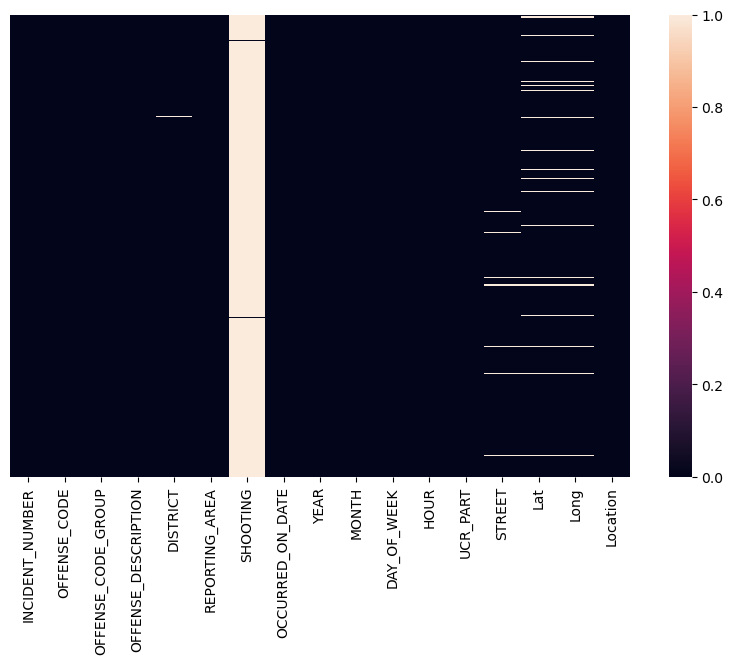

In [19]:
figure = plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels='')

In [20]:
df.drop('SHOOTING',axis = 1,inplace = True)

### 数据处理及增加数据新特征

In [21]:
df.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

In [22]:
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])

df['OFFENSE_CODE_GROUP'] = df['OFFENSE_CODE_GROUP'].astype(CategoricalDtype())
df['OFFENSE_DESCRIPTION'] = df['OFFENSE_DESCRIPTION'].astype(CategoricalDtype())
df['DISTRICT'] = df['DISTRICT'].astype(CategoricalDtype())
df['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].astype(CategoricalDtype())
df['UCR_PART'] = df['UCR_PART'].astype(CategoricalDtype())

In [23]:
df.dtypes

INCIDENT_NUMBER                object
OFFENSE_CODE                    int64
OFFENSE_CODE_GROUP           category
OFFENSE_DESCRIPTION          category
DISTRICT                     category
REPORTING_AREA                 object
OCCURRED_ON_DATE       datetime64[ns]
YEAR                            int64
MONTH                           int64
DAY_OF_WEEK                  category
HOUR                            int64
UCR_PART                     category
STREET                         object
Lat                           float64
Long                          float64
Location                       object
dtype: object

In [24]:
rename = {'OFFENSE_CODE_GROUP':'group','OFFENSE_DESCRIPTION':'Decription','DISTRICT':'District','OCCURRED_ON_DATE':'Date',
         'YEAR':'Year','MONTH':'Month','DAY_OF_WEEK':'Day','HOUR':'Hour','STREET':'Street'}
df.rename(index = str,columns = rename,inplace = True)

In [25]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,group,Decription,District,REPORTING_AREA,Date,Year,Month,Day,Hour,UCR_PART,Street,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


### 增加新特征用于后面的时间影响分析

In [26]:
def create_features(df):

    df['dayofweek'] = df['Date'].dt.dayofweek
    df['quarter'] = df['Date'].dt.quarter
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['dayofmonth'] = df['Date'].dt.day
    df['weekofyear'] = df['Date'].dt.weekofyear
    
    X = df[['dayofweek','quarter','dayofyear','dayofmonth','weekofyear']]
    return X

In [27]:
create_features(df).head()

,dayofweek,quarter,dayofyear,dayofmonth,weekofyear
0,6,3,245,2,35
1,1,3,233,21,34
2,0,3,246,3,36
3,0,3,246,3,36
4,0,3,246,3,36


In [28]:
X = create_features(df)

In [29]:
X.dtypes

dayofweek     int64
quarter       int64
dayofyear     int64
dayofmonth    int64
weekofyear    int64
dtype: object

In [30]:
X.shape

(319073, 5)

In [31]:
df.shape

(319073, 21)

In [32]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'group', 'Decription', 'District',
       'REPORTING_AREA', 'Date', 'Year', 'Month', 'Day', 'Hour', 'UCR_PART',
       'Street', 'Lat', 'Long', 'Location', 'dayofweek', 'quarter',
       'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [33]:
df.dtypes

INCIDENT_NUMBER            object
OFFENSE_CODE                int64
group                    category
Decription               category
District                 category
REPORTING_AREA             object
Date               datetime64[ns]
Year                        int64
Month                       int64
Day                      category
Hour                        int64
UCR_PART                 category
Street                     object
Lat                       float64
Long                      float64
Location                   object
dayofweek                   int64
quarter                     int64
dayofyear                   int64
dayofmonth                  int64
weekofyear                  int64
dtype: object

In [34]:
df.dayofweek  = df.dayofweek.astype(CategoricalDtype())
df.quarter = df.quarter.astype(CategoricalDtype())
df.dayofyear = df.dayofyear.astype(CategoricalDtype())
df.dayofmonth = df.dayofmonth.astype(CategoricalDtype())
df.weekofyear = df.weekofyear.astype(CategoricalDtype())

In [35]:
df.dtypes

INCIDENT_NUMBER            object
OFFENSE_CODE                int64
group                    category
Decription               category
District                 category
REPORTING_AREA             object
Date               datetime64[ns]
Year                        int64
Month                       int64
Day                      category
Hour                        int64
UCR_PART                 category
Street                     object
Lat                       float64
Long                      float64
Location                   object
dayofweek                category
quarter                  category
dayofyear                category
dayofmonth               category
weekofyear               category
dtype: object

### EDA 探索犯罪与时间的关系

<Axes: xlabel='Month', ylabel='count'>

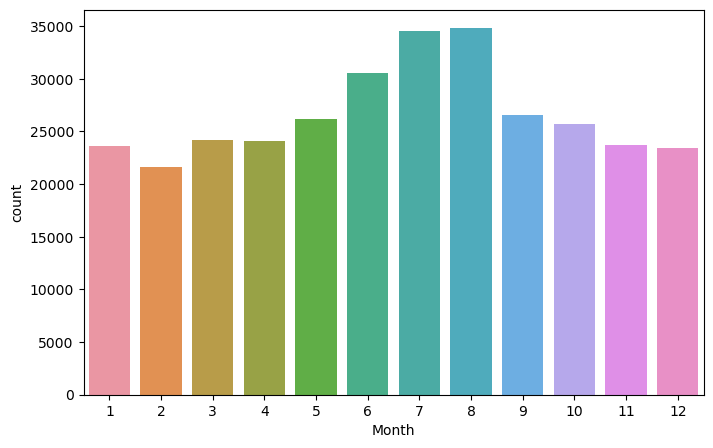

In [36]:
plt.figure(figsize = (8,5))
sns.countplot(data = df,x = 'Month')

#### 从图中可以看出6月7月8月的犯罪率是最高的，夏季是犯罪的高发期。

<Axes: xlabel='Year', ylabel='count'>

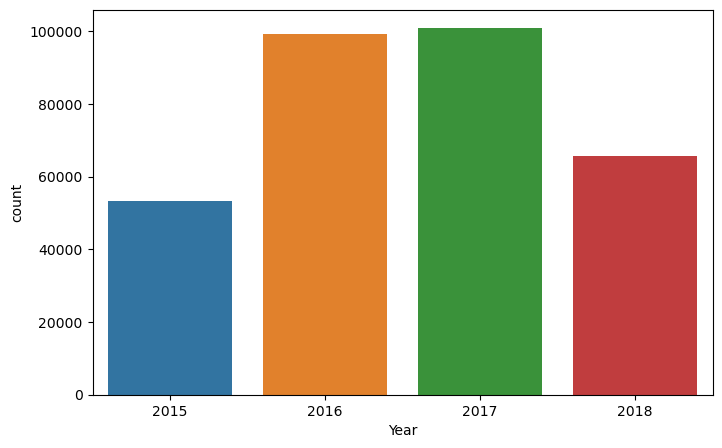

In [37]:
plt.figure(figsize = (8,5))
sns.countplot(data = df,x = 'Year')

<Axes: xlabel='Hour', ylabel='count'>

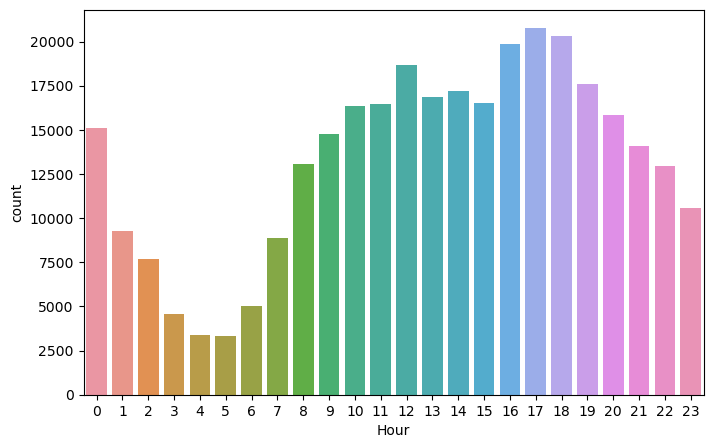

In [38]:
plt.figure(figsize = (8,5))
sns.countplot(data = df,x = 'Hour')

#### 犯罪率最高的时间为下午16~18点。

#### 观测犯罪地区和犯罪组织的关系和影响(双特征)

<Axes: xlabel='group', ylabel='count'>

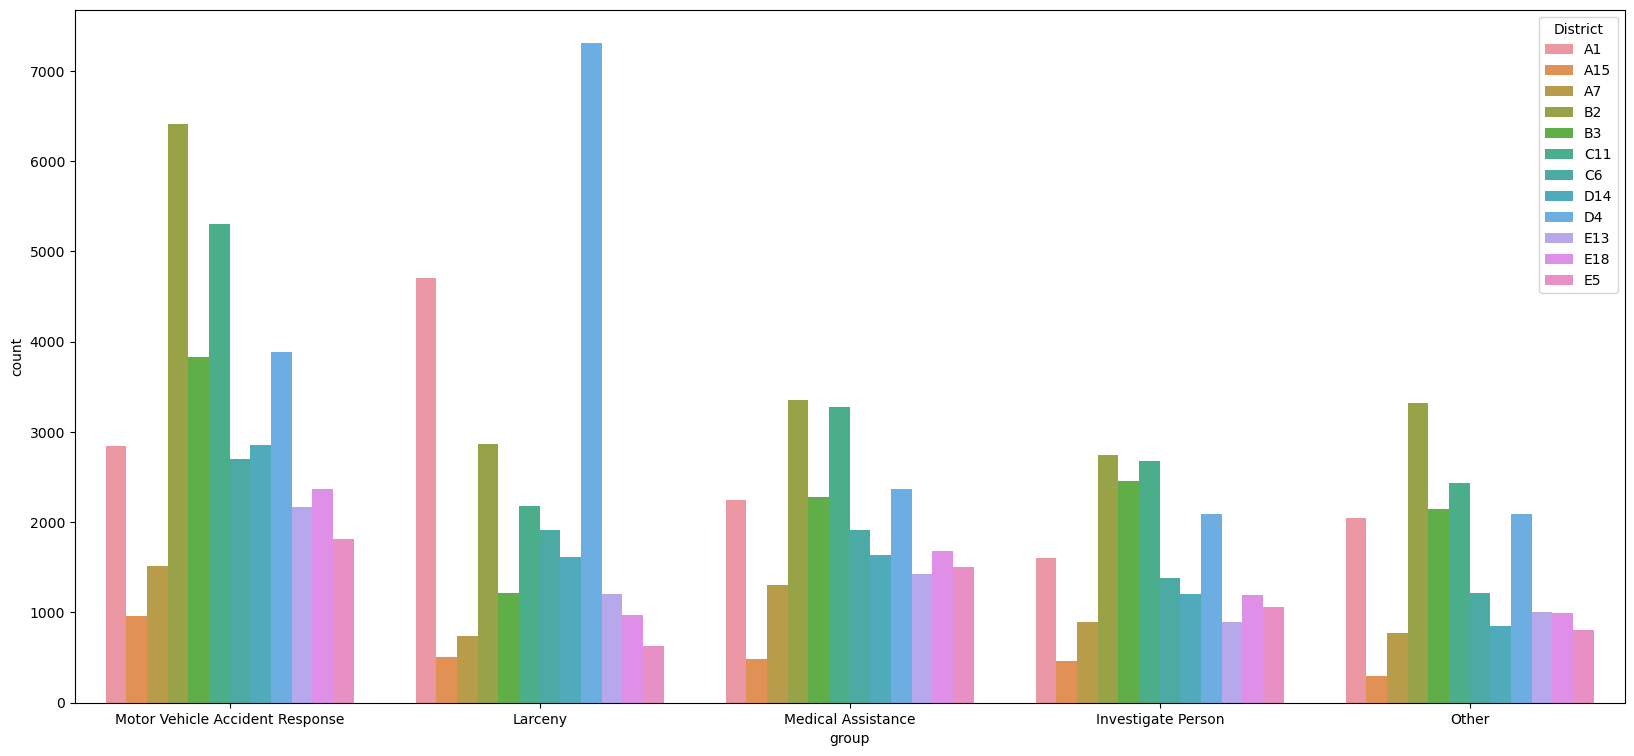

In [39]:
rcParams['figure.figsize'] = 20,9
order = df['group'].value_counts().head(5).index
sns.countplot(data = df,x = 'group',hue = 'District',order = order)

#### 观测犯罪地区和犯罪月份的关系和影响

In [40]:
df.Year.unique()

array([2018, 2017, 2016, 2015])

<Axes: xlabel='Month', ylabel='group'>

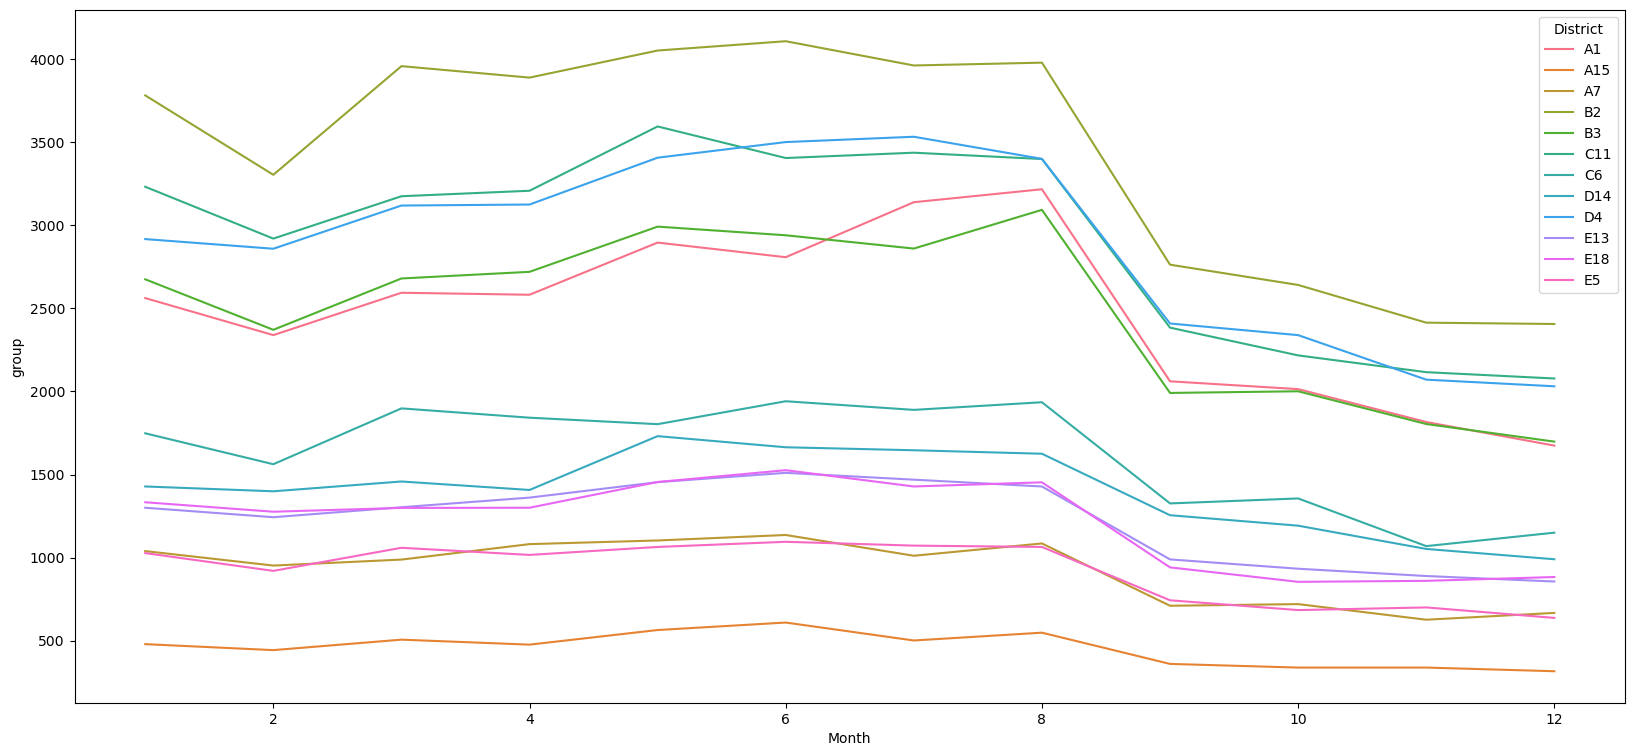

In [41]:
nask = ((df['Year'] == 2018) | (df['Year'] == 2017) | (df['Year'] == 2016))
grouped = df[nask].groupby(['Month','District']).count()
sns.lineplot(data = grouped.reset_index(),x = 'Month',hue = 'District',y = 'group')

<Axes: xlabel='Month', ylabel='group'>

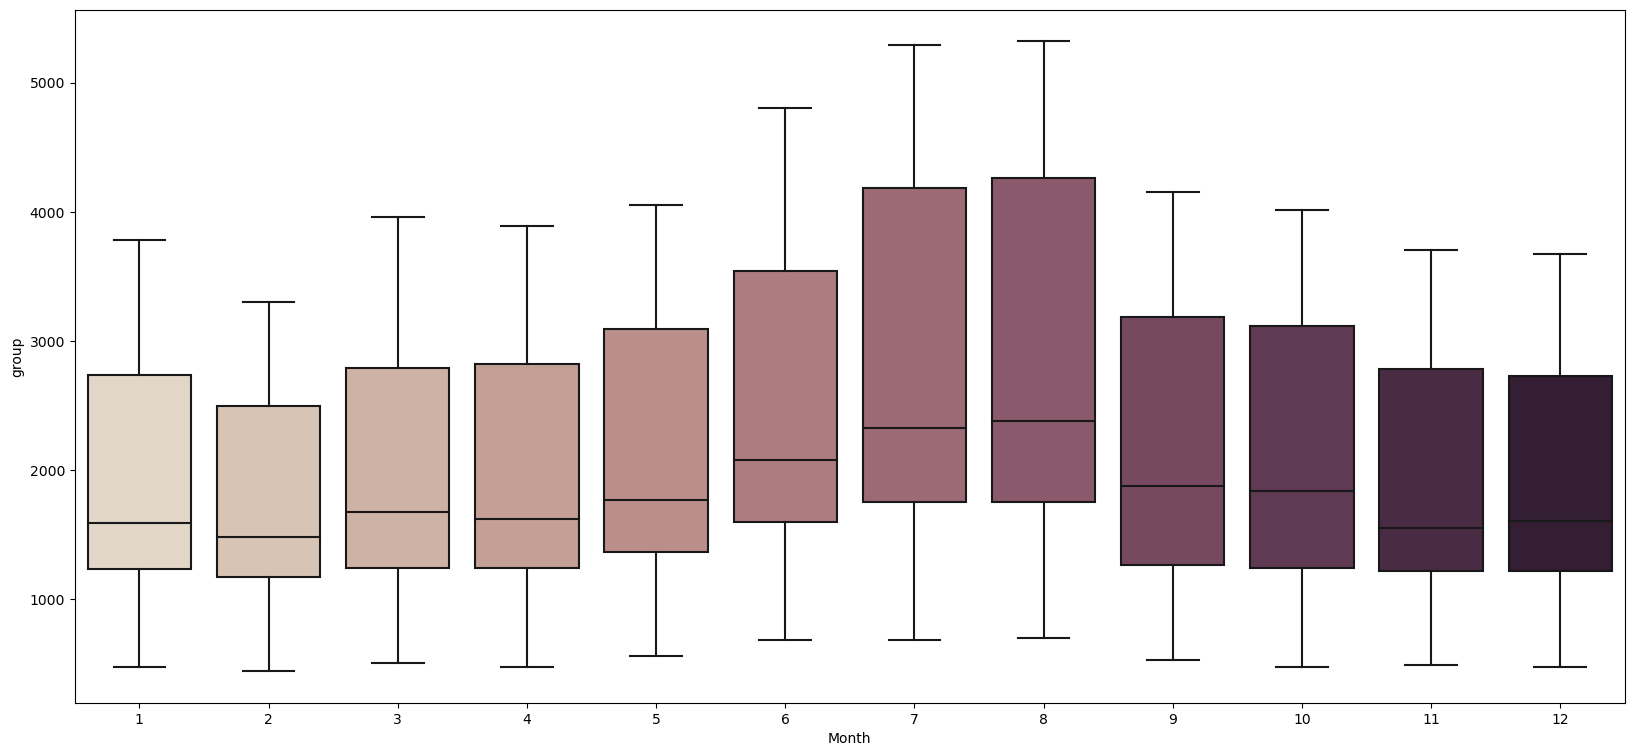

In [42]:
grouped = df.groupby(['Month','District']).count()
sns.boxplot(data = grouped.reset_index(),x = 'Month',y = 'group',palette = 'ch:.25')

#### 观测犯罪组织的危险程度

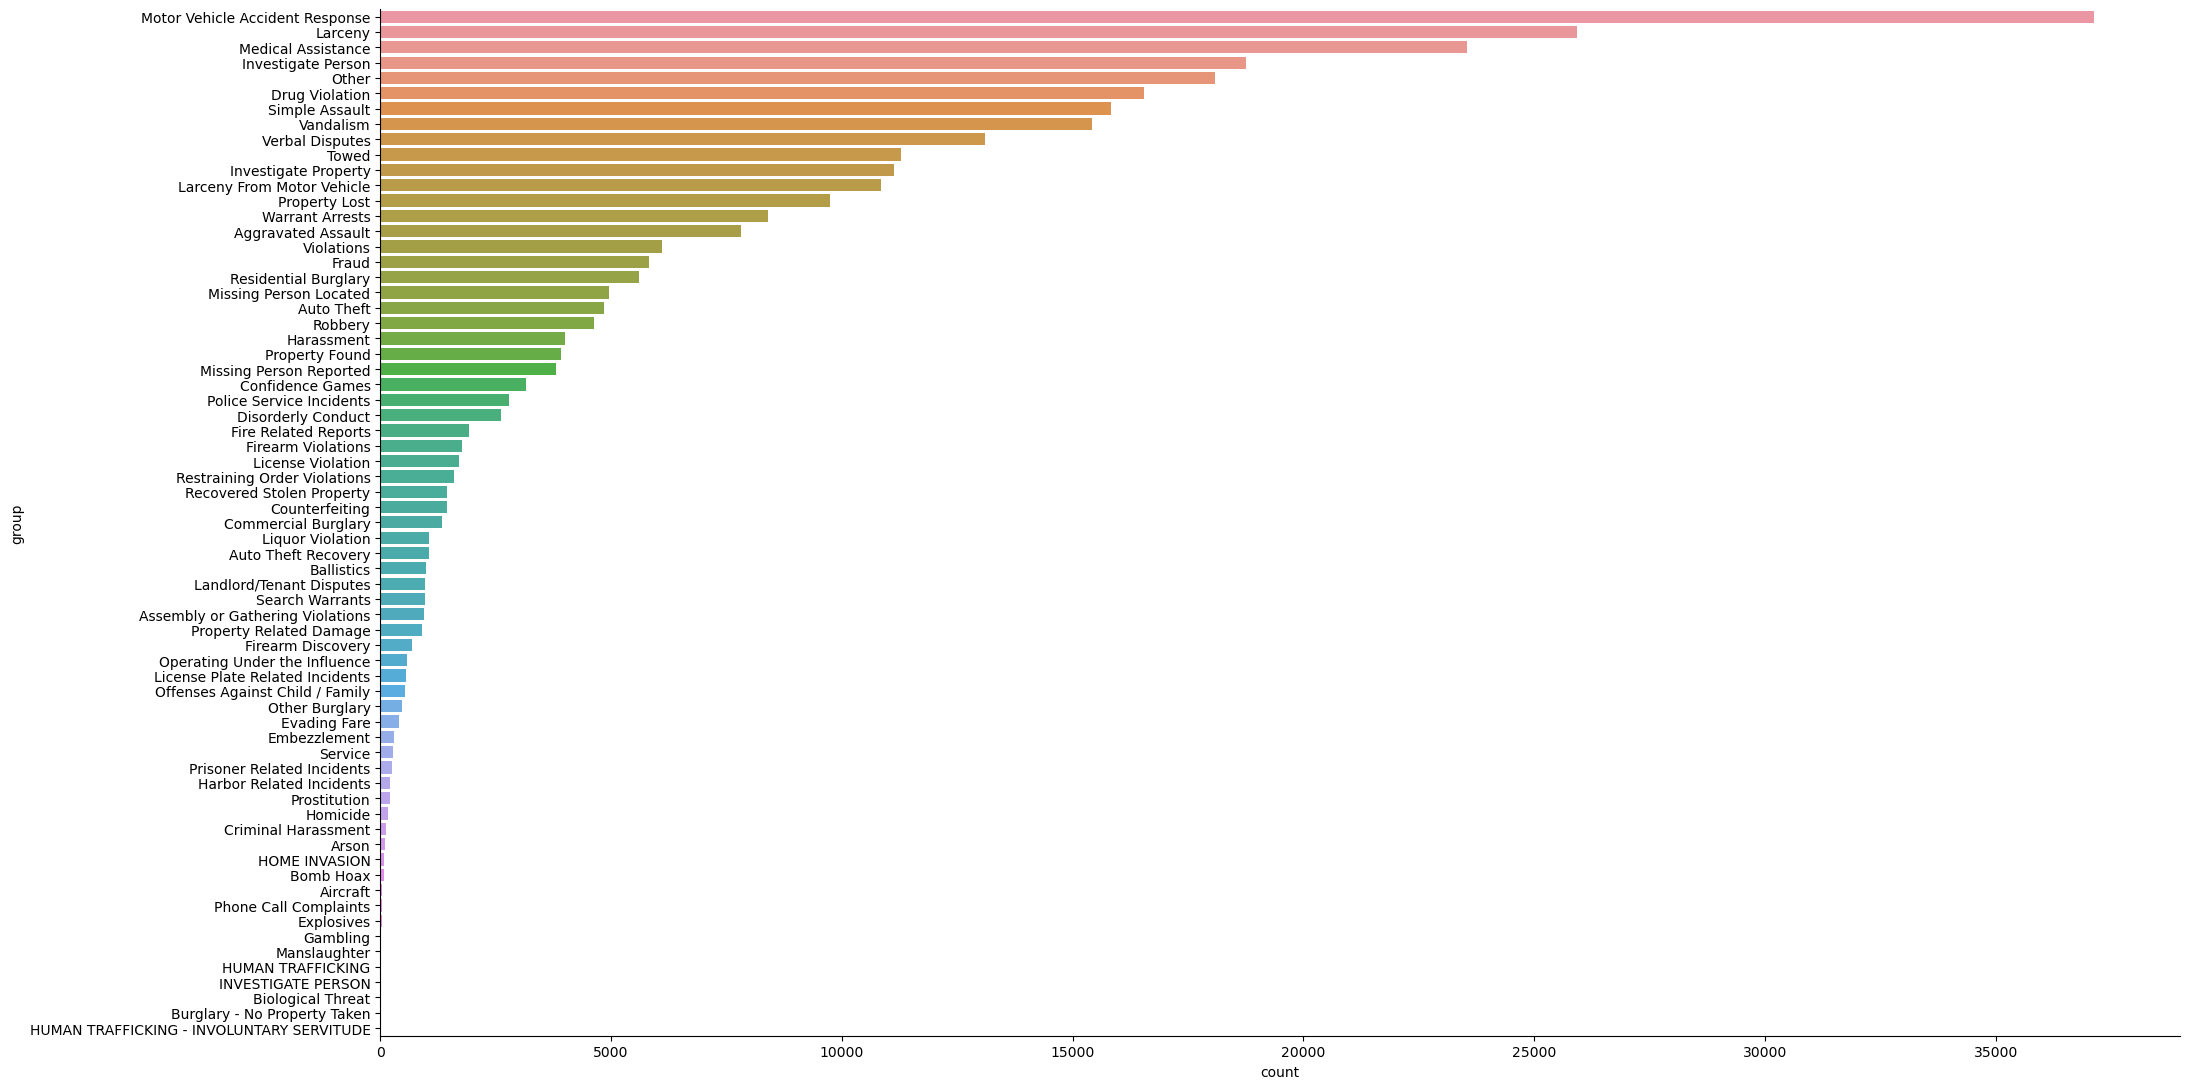

In [43]:
sns.catplot(y = 'group',
           kind = 'count',
           height = 11,
           aspect = 2,
           order = df.group.value_counts().index,
           data = df)

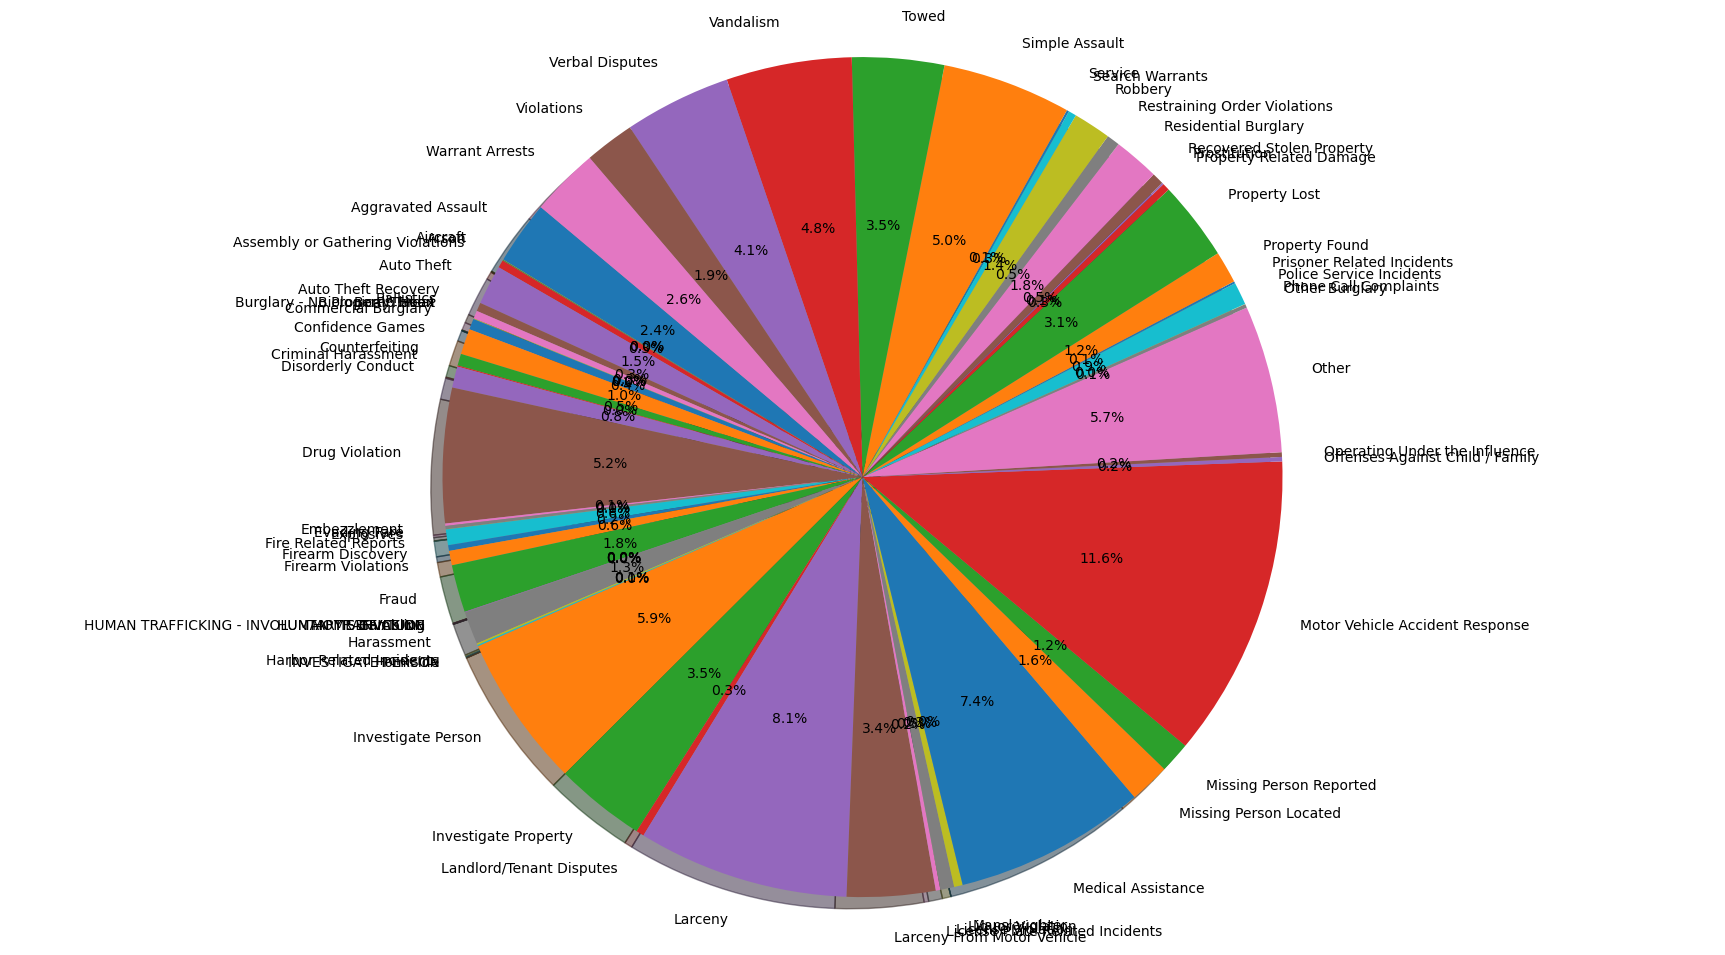

In [44]:
labels = df['group'].astype('category').cat.categories.tolist()
counts = df['group'].value_counts()

sizes = [counts[var_cat] for var_cat in labels]
fig1,ax1 = plt.subplots(figsize = (22,12))
ax1.pie(sizes,labels = labels,autopct = '%1.1f%%',shadow = True,startangle = 140)
ax1.axis('equal')
plt.show()

#### 观测犯罪地区和其他特征的影响以及其他特征的密度分析

In [45]:
def eda_numeric(df,feature):
    x_ = df[feature]
    y_ = df['District']
    data = pd.concat([x_,y_],1)
    plt.figure(figsize = (20,5))
    
    ax1 = plt.subplot(1,2,1)
    sns.boxplot(data = data,x = 'District',y = feature)
    plt.title(feature + '-Boxplot')
    
    ax2 = plt.subplot(1,2,2)
    plt.title(feature + '-Density')
    sns.kdeplot(data[data['District'] == 'D4'][feature].apply(np.log),color = 'b',legend = False)
    
    plt.legend(loc = 'upper right',labels = ['0'])
    plt.tight_layout()
    plt.show()

In [46]:
rm_list = ['lat','long']
type_list = ['int32','int64']
feature_list = []

for feature in df.columns:
    if (feature not in rm_list) & (df[feature].dtypes in type_list) & (len(df[feature].unique()) > 2):
        feature_list.append(feature)

Feature:  OFFENSE_CODE


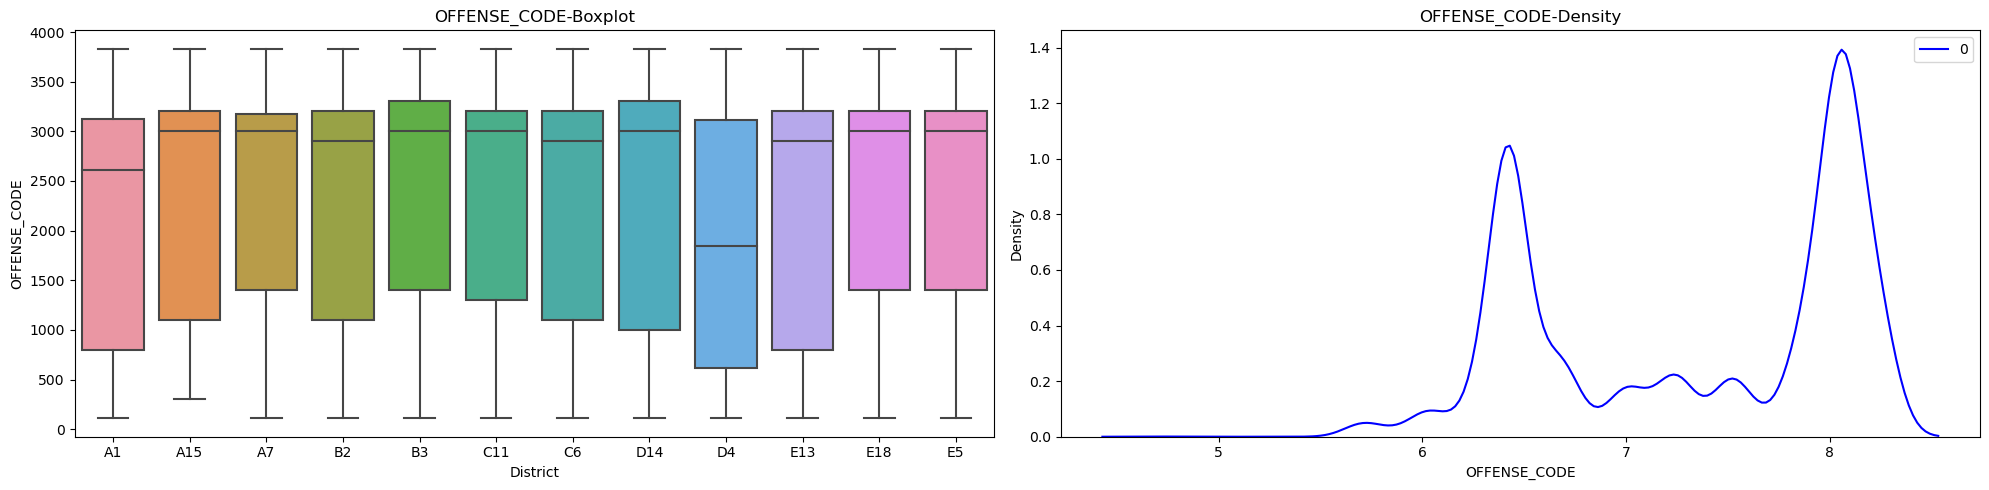

Feature:  Year


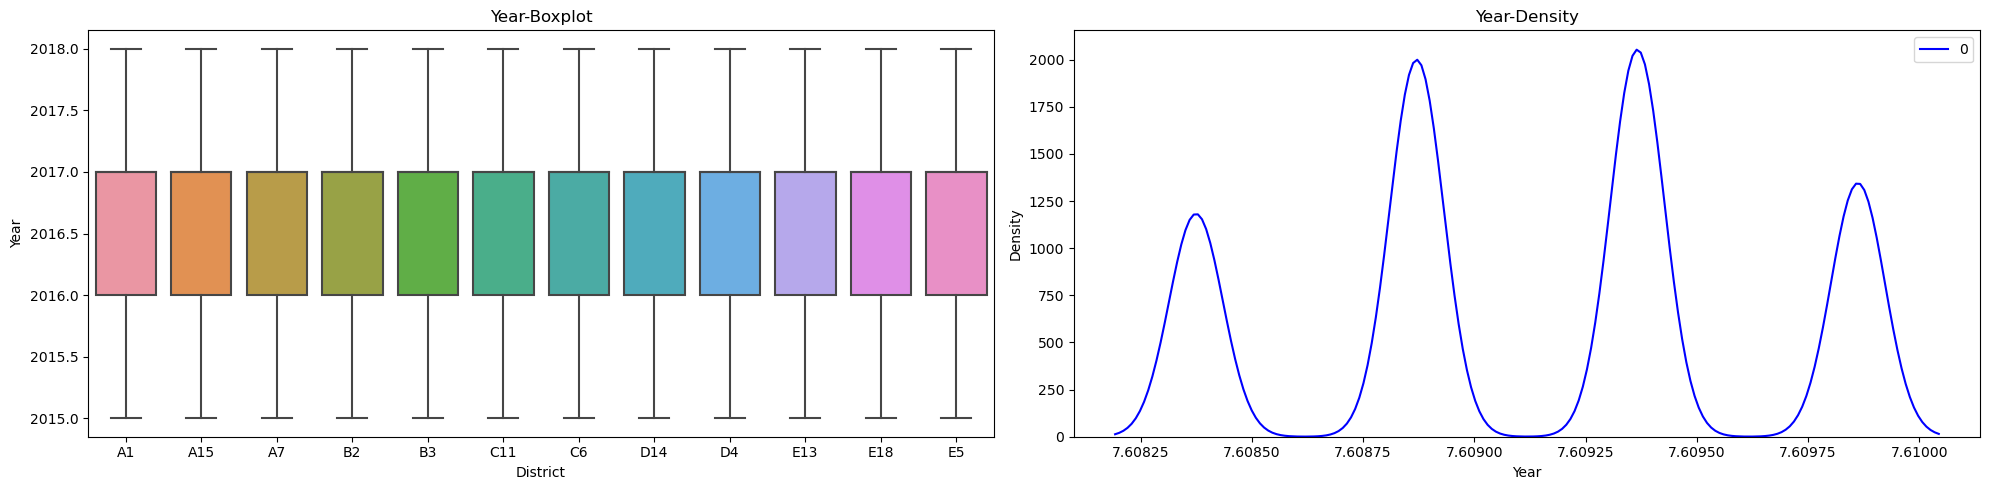

Feature:  Month


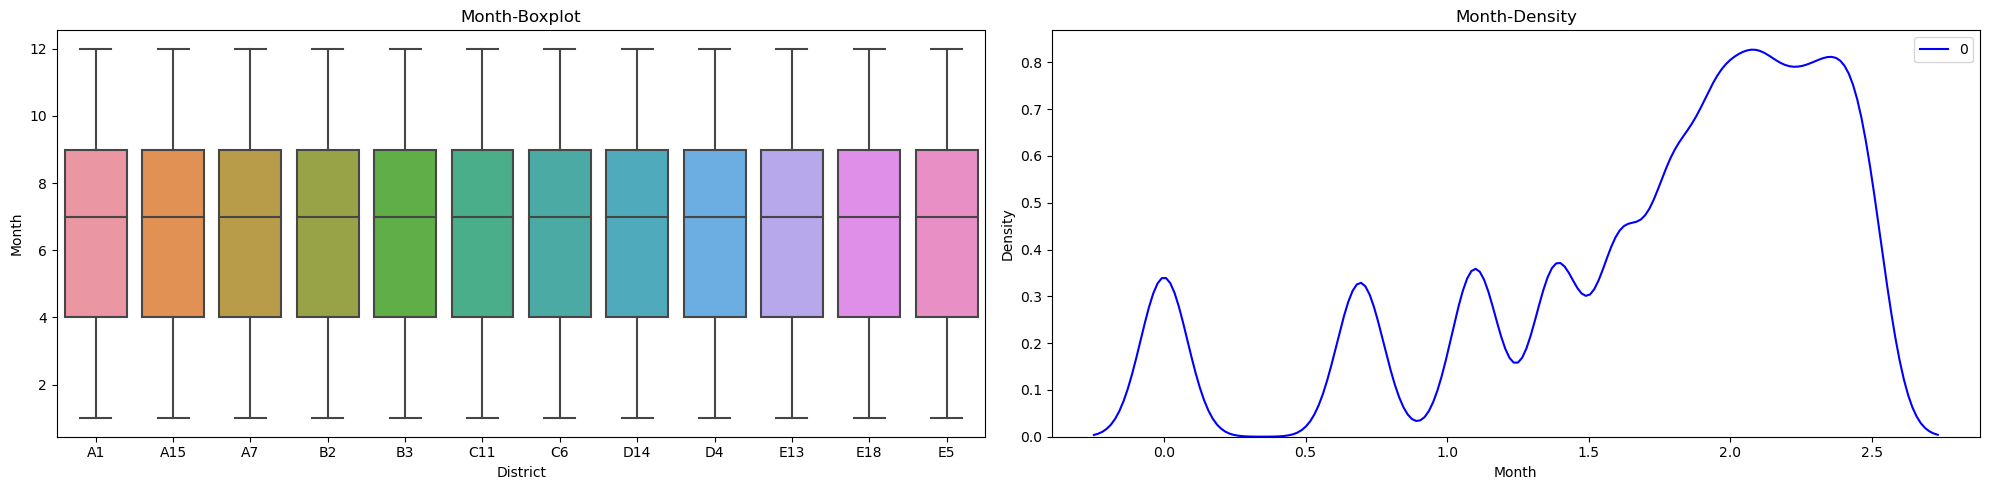

Feature:  Hour


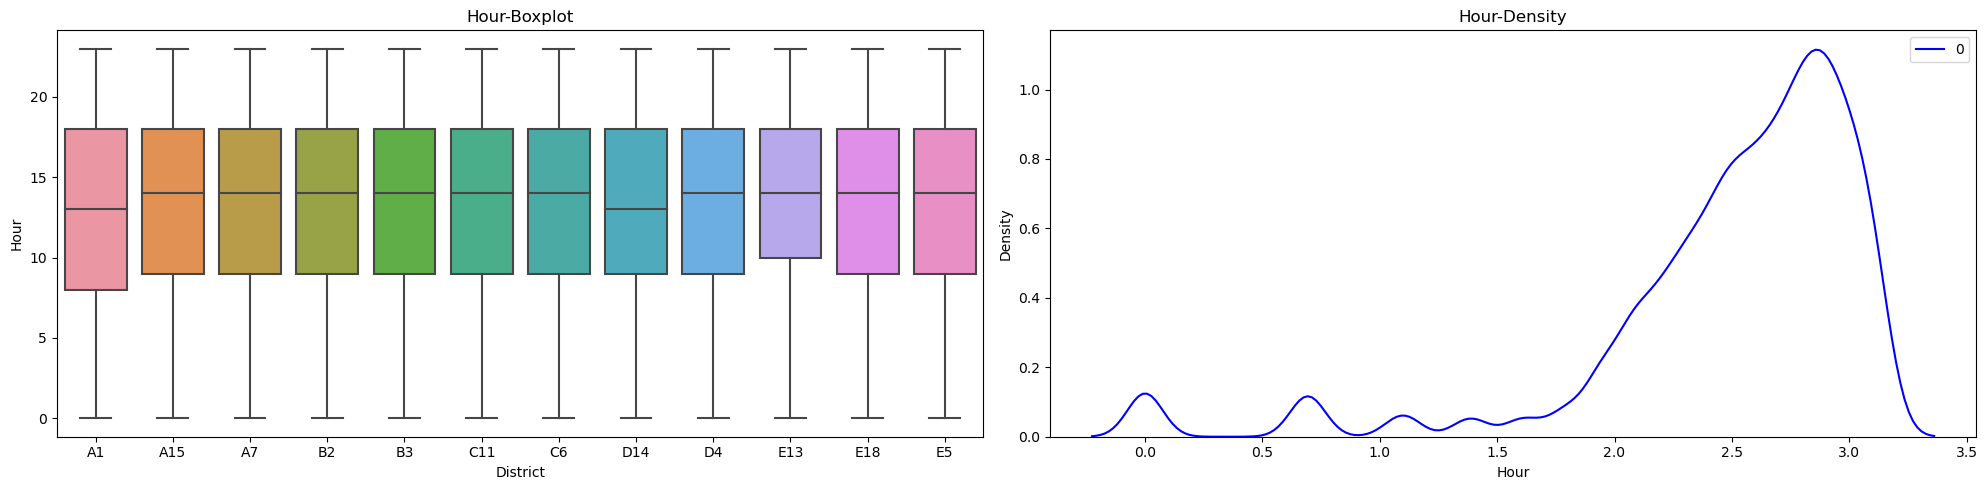

In [47]:
df_drop = df.dropna().copy()
for feature in feature_list:
    print('Feature: ',feature)
    eda_numeric(df_drop,feature)

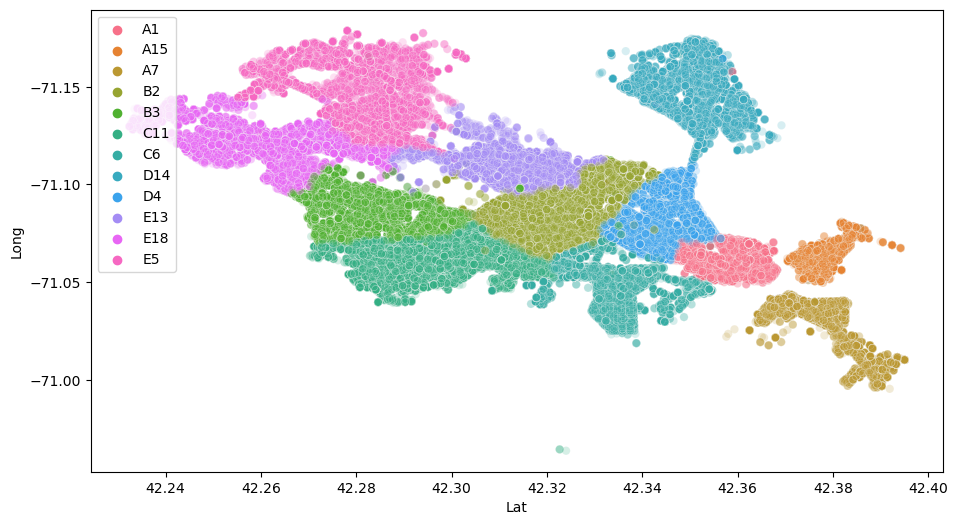

In [48]:
df.Lat.replace(-1,None,inplace = True)
df.Long.replace(-1,None,inplace = True)

rcParams['figure.figsize'] = 21,11
plt.subplots(figsize = (11,6))
sns.scatterplot(x = 'Lat',
               y = 'Long',
               hue = 'District',
               alpha = 0.2,
               data = df)
plt.legend(loc = 2)

In [49]:
B2_district = df.loc[df['District'] == 'B2'][['Lat','Long']]

B2_district.Lat.fillna(0,inplace = True)
B2_district.Long.fillna(0,inplace = True)

map_1 = folium.map(location = [42.356145,-71.064083],
                  tiles = 'OpenStreetMap',
                  zoom_start = 11)
folium.circlemarker([42.356145,-71.064083],
                   radius = 70,
                   fillcolor = '#b22222',
                   popup = 'Homicide',
                   color = 'red',
                   ).add_to(map_1)
HeatMap(data = B2_district,radius = 16).add_to(map_1)
map_1

TypeError: 'module' object is not callable

### Boston犯罪分析项目总结

EDA，在数据清洗和建模工作之前，对数据集的分布有一个总体的认识。探索各个特征之间的关系。
EDA部分的主要工作在于数据可视化，前提是对数据做了初步的预处理工作。在本例子中，将许多object类型的数据转化为了category类型。
熟悉sns.countplot(),sns.boxplot(),sns.kdeplot(),sns.lineplot(),sns.heatmap(),sns.scatterplot()
sns.countplot(data,x,hue,order)适合单特征分析。
sns.lineplot(data,x,y,hue)
sns.boxplot(data,x,y)
sns.scatterplot(data,x,y,hue,alpha)
带有时间特性的数据处理，时间特性可以增加很多特征
地图数据的绘制，仍然需要探索的一个地方